In [85]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Laboratory work 2

In [86]:
df = pd.read_csv('global_preprocessed.csv', encoding='ISO-8859-1')
row_count = df.shape[0]
column_count = df.shape[1]

Shape of the database

In [87]:
print(f'The DataFrame has {row_count} rows.')
print(f'The DataFrame has {column_count} columns.')
df.head()

The DataFrame has 171280 rows.
The DataFrame has 26 columns.


,iyear,extended,nkill,nwound,nperps,North America,Central America & Caribbean,South America,Southeast Asia,East Asia,...,Australasia & Oceania,Assassination,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Facility/Infrastructure Attack,Unarmed Assault,Unknown
0,1970,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970,0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1970,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1970,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


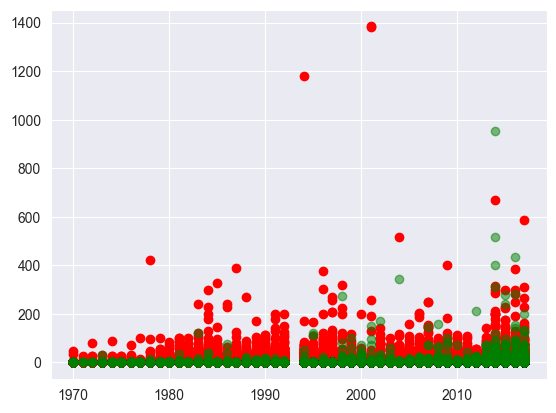

In [88]:
df0 = df[df.extended==0]
df1 = df[df.extended>0]
plt.scatter(df0["iyear"], df0["nkill"], color="red", alpha=1)
plt.scatter(df1["iyear"], df1["nkill"], color="green", alpha=0.5)

1. Model training and parameter selection using Grid Search

In [89]:
x = df.drop("extended", axis=1)
y = df['extended']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

a. K-nearest neighbors (KNN)

In [90]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [91]:
knn.score(x_test.values, y_test.values)

D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9535730966837926

D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

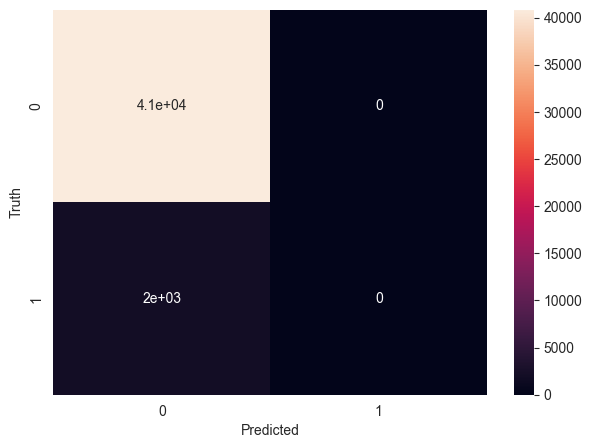

In [92]:
y_pred = knn.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     40832
           1       0.00      0.00      0.00      1988

    accuracy                           0.95     42820
   macro avg       0.48      0.50      0.49     42820
weighted avg       0.91      0.95      0.93     42820


D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programming\PycharmProjects\MLLab01\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
df_show = df.join(y_pred)
df0 = df[y_pred==0]
df1 = df[y_pred>0]
plt.scatter(df0["iyear"], df0["nkill"], color="red", alpha=1)
plt.scatter(df1["iyear"], df1["nkill"], color="green", alpha=0.5)

AttributeError: 'numpy.int64' object has no attribute 'index'

b. Support Vector Classification (SVM)

In [ ]:
model = SVC()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

In [ ]:
y_pred = model.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(classification_report(y_test, y_pred))

c. Decision tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

In [ ]:
y_pred = model.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
plot_tree(model, max_depth=2, fontsize=10)